<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>-------------------------------------------------------------------------------- NOTA IMPORTANT ---------------------------------------------------------------------------------</strong>

Els gràfics proposats per a la resolució d'aquesta PAC han estat trobats a: 

- _DataViz Project_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://datavizproject.com/](https://datavizproject.com/)
- _Data to Viz_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://www.data-to-viz.com/](https://www.data-to-viz.com/)
</div>

In [1]:
!pip install spiderplot

In [2]:
!pip install plotly pandas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spiderplot as sp # Per fer el spiderplot
import plotly.express as px # Per fer el choropleth

In [4]:
df = pd.read_csv("hotel_bookings.csv")

<div style="background-color: #d2ffc9; border-color: #004000; border-left: 5px solid #004000; padding:0.5sem;">
<strong>----------------------------------------------------------------- Neteja de dades -> Igual que el script R enunciat ----------------------------------------------------------------</strong>
</div>

In [5]:
# -- Comprovació de nulls --
df.isna().any() # Bibliografia: [Ref.1] i [Ref.2]

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [6]:
df["children"] = df["children"].fillna(0).copy()
df.isna().any() # Bibliografia: [Ref.1] i [Ref.2]

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [7]:
# -- Tractament de outliers (Com al script de R) -- 
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[df_no_outliers["adults"] < 10].copy()
df_no_outliers = df_no_outliers[df_no_outliers["children"] < 5].copy()
df_no_outliers = df_no_outliers[df_no_outliers["babies"] < 5].copy()
df_no_outliers = df_no_outliers[(df_no_outliers["adults"] + df_no_outliers["children"] + df_no_outliers["babies"]) > 0].copy()
df_no_outliers = df_no_outliers[(df_no_outliers["stays_in_week_nights"] + df_no_outliers["stays_in_weekend_nights"]) > 0].copy()
df_no_outliers = df_no_outliers[df_no_outliers["adr"] > 0].copy()
df_no_outliers = df_no_outliers[(df_no_outliers["adr"] > 0) & (df_no_outliers["adr"] < 1000)].copy()
df_no_outliers = df_no_outliers[df_no_outliers["market_segment"] != "Undefined"].copy()
df_no_outliers = df_no_outliers[df_no_outliers["is_canceled"] == 0].copy()

<div style="background-color: #d2ffc9; border-color: #004000; border-left: 5px solid #004000; padding:0.5sem;">
<strong>------------------------------------------------------------------------------- Gràfics nus de la història ------------------------------------------------------------------------------</strong>
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>-------------------------------------------------------------------------- Gràfic de línies ADR per mes ----------------------------------------------------------------------------</strong>
</div>

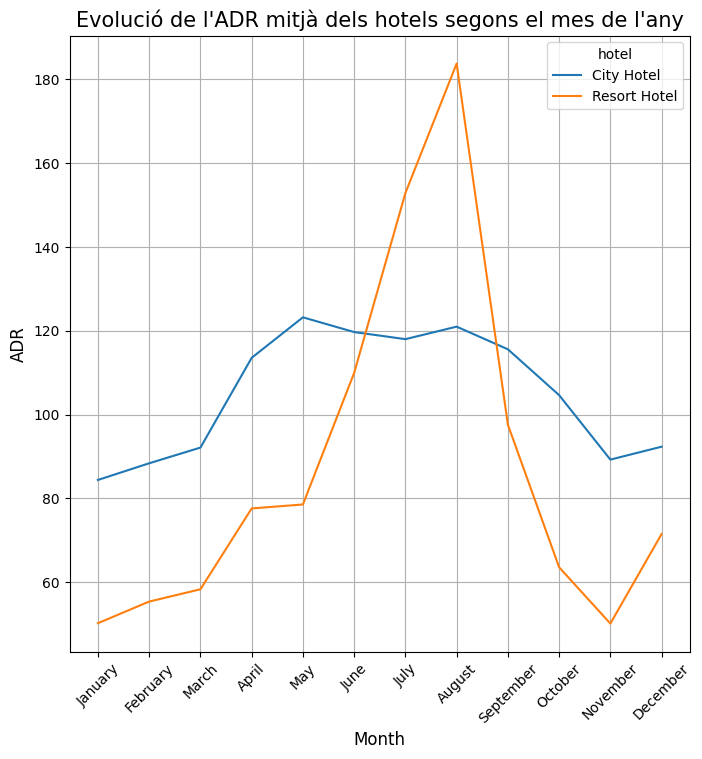

In [8]:
# -- Preparació dades per a gràfic de línies ADR per mes --
df_graphic_adr = df_no_outliers.groupby(["hotel", "arrival_date_month"])["adr"].mean().copy().reset_index() # Bibliografia: [Ref.3] i [Ref.4]
df_graphic_adr = pd.DataFrame(df_graphic_adr).copy()
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_graphic_adr["arrival_date_month"] = pd.Categorical(df_graphic_adr["arrival_date_month"],
                                                      categories=ordered_months, ordered=True) # Bibliografia: [Ref.5]
df_graphic_adr = df_graphic_adr.sort_values(["hotel", "arrival_date_month"])
df_graphic_adr

# -- Gràfic de línies ADR per mes --
plt.figure(figsize=(8,8))
sns.lineplot(df_graphic_adr, x="arrival_date_month", y="adr", hue="hotel") # Bibliografia: [Ref.6]
plt.title("Evolució de l'ADR mitjà dels hotels segons el mes de l'any", fontsize=15)
plt.ylabel("ADR", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.tick_params(axis="x", labelrotation=45) # Bibliografia: [Ref.7]
plt.grid()
plt.savefig("pictures/lines_month.png")
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>--------------------------------------------------------------- Lollipop ADR per nombre de peticions especials -----------------------------------------------------------------</strong>
</div>

In [9]:
# -- Preparació dades per a gràfic Lollipop ADR mitjà segons peticions especials --
df_lollipop_group = df_no_outliers.groupby(["hotel", "total_of_special_requests"])["adr"].mean().copy().reset_index() # Bibliografia: [Ref.3] i [Ref.4]
df_lollipop = pd.DataFrame(df_lollipop_group).copy()
df_lollipop = df_lollipop.sort_values(["hotel", "total_of_special_requests"])
df_lollipop_city = df_lollipop[df_lollipop["hotel"] == "City Hotel"].copy()
df_lollipop_resort = df_lollipop[df_lollipop["hotel"] == "Resort Hotel"].copy()

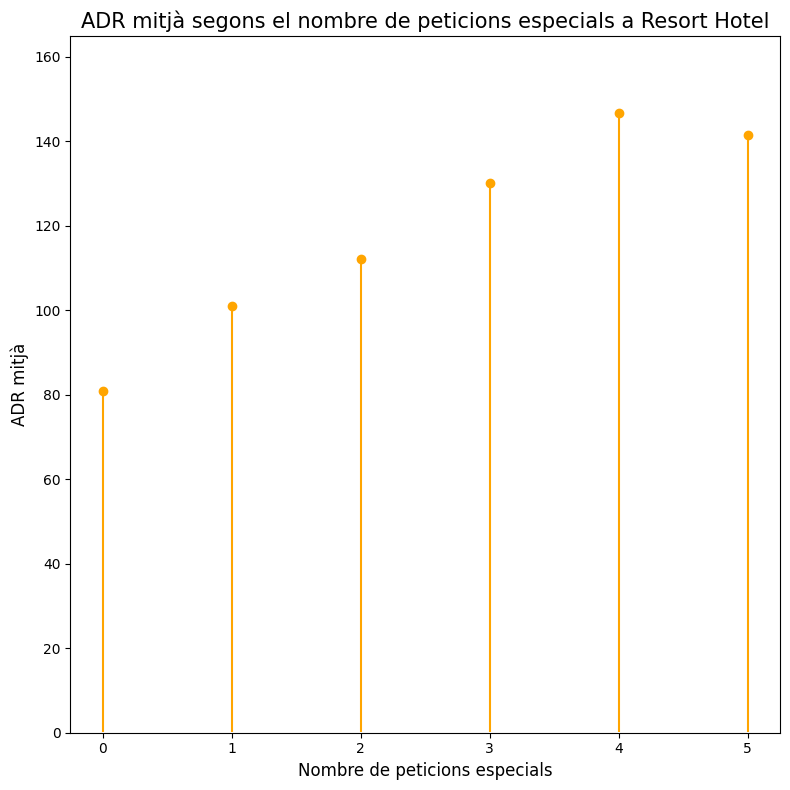

In [10]:
# --Lollipop ADR mitjà segons peticions especials Resort Hotel --
# Bibliografia: [Ref.8]
range_lollipop = range(len(df_lollipop_resort.index))
plt.figure(figsize=(8,8))
plt.stem(df_lollipop_resort["adr"], linefmt="orange", markerfmt="orange", basefmt="white") # Bibliografia: [Ref.9]
plt.xticks(range_lollipop, df_lollipop_resort["total_of_special_requests"])
plt.ylim(0, 165) # Bibliografia: [Ref.10]
plt.title("ADR mitjà segons el nombre de peticions especials a Resort Hotel", fontsize=15)
plt.ylabel("ADR mitjà", fontsize=12)
plt.xlabel("Nombre de peticions especials", fontsize=12)
plt.tight_layout()
plt.savefig("pictures/lollipop_special_petitions_resort.png")
plt.show()

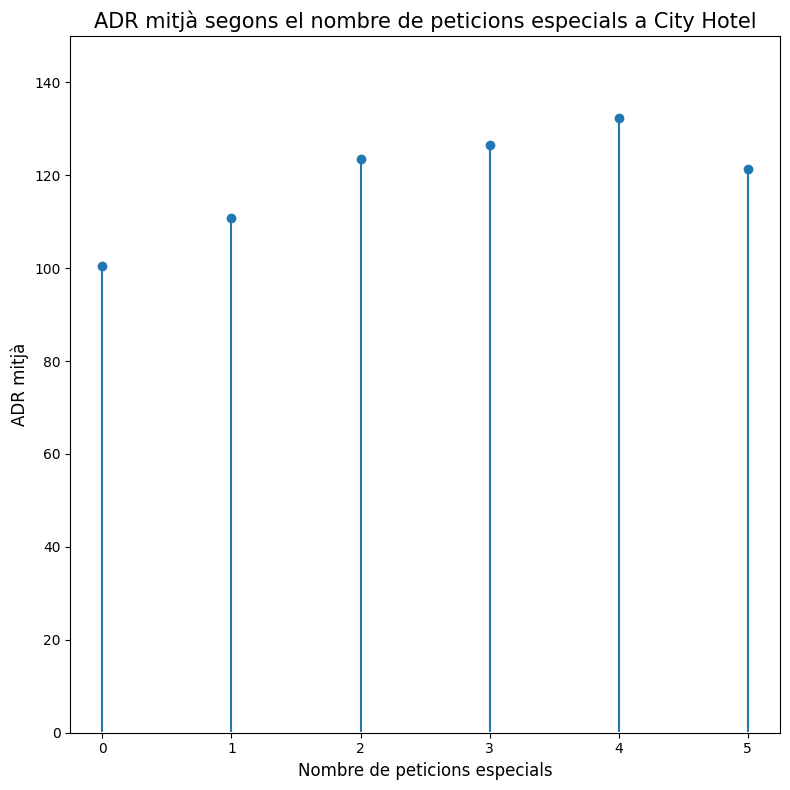

In [11]:
# --Lollipop ADR mitjà segons peticions especials City Hotel --
# Bibliografia: [Ref.8]
range_lollipop = range(len(df_lollipop_city.index))
plt.figure(figsize=(8,8))
plt.stem(df_lollipop_city["adr"], basefmt="white") # Bibliografia: [Ref.9]
plt.ylim(0, 150) # Bibliografia: [Ref.10]
plt.xticks(range_lollipop, df_lollipop_city["total_of_special_requests"])
plt.title("ADR mitjà segons el nombre de peticions especials a City Hotel", fontsize=15)
plt.ylabel("ADR mitjà", fontsize=12)
plt.xlabel("Nombre de peticions especials", fontsize=12)
plt.tight_layout()
plt.savefig("pictures/lollipop_special_petitions_city.png")
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>----------------------------------------------------------------------- Barres ADR segons nombre de fills ------------------------------------------------------------------------</strong>
</div>

In [12]:
# -- Preparació dades per a gràfic de barres ADR mitjà segons nombre de fills --
df_no_outliers["with_children"] = (df_no_outliers["babies"] + df_no_outliers["children"]).astype(int).copy() # Bibliografia: [Ref.11] i [Ref.12]
df_number_kids_grouped = df_no_outliers.groupby(["hotel",
                                                 "with_children"]
                                               )["adr"].mean().copy().reset_index() # Bibliografia: [Ref.3] i [Ref.4]

df_number_kids = pd.DataFrame(df_number_kids_grouped).copy()
df_number_kids_city = df_number_kids[df_number_kids["hotel"] == "City Hotel"].copy()
df_number_kids_resort = df_number_kids[df_number_kids["hotel"] == "Resort Hotel"].copy()

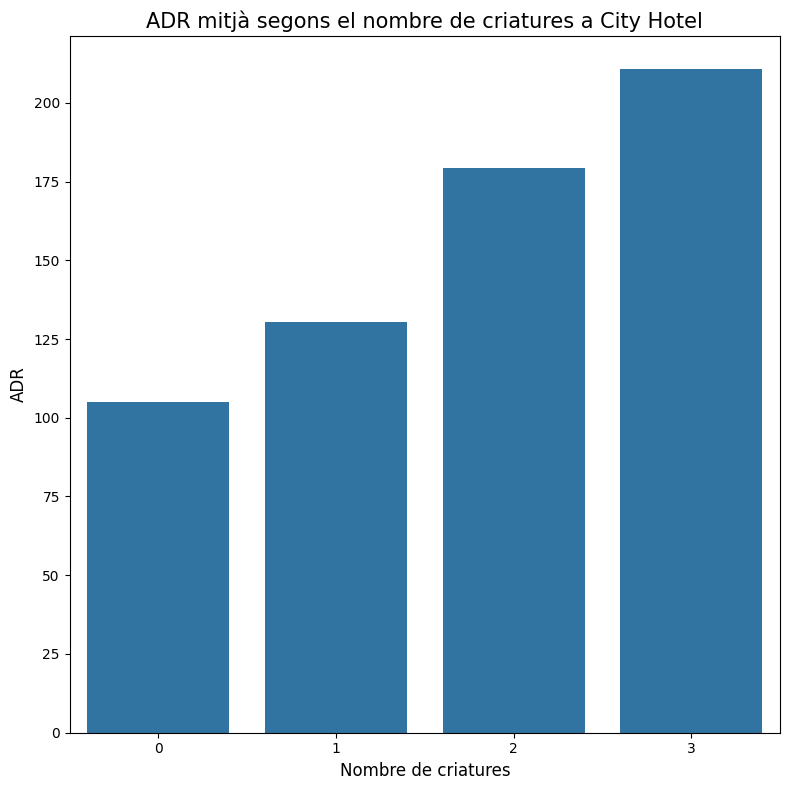

In [13]:
# -- Barres ADR mitjà segons nombre de fills City Hotel--
plt.figure(figsize=(8,8))
sns.barplot(df_number_kids_city, x="with_children", y="adr", errorbar=None) # Bibliografia: [Ref.13]
plt.title("ADR mitjà segons el nombre de criatures a City Hotel", fontsize=15)
plt.ylabel("ADR", fontsize=12)
plt.xlabel("Nombre de criatures", fontsize=12)
plt.tight_layout()
plt.savefig("pictures/bars_number_children_city.png")
plt.show()

<Figure size 640x480 with 0 Axes>

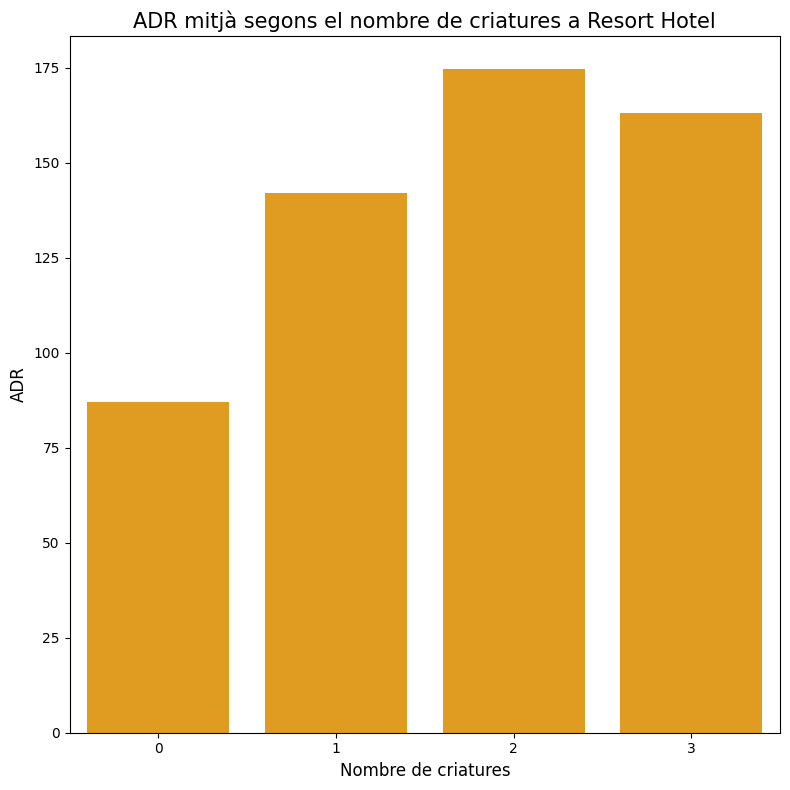

In [14]:
# -- Barres ADR mitjà segons nombre de fills City Hotel--
plt.figure()
plt.figure(figsize=(8,8))
sns.barplot(df_number_kids_resort, x="with_children", y="adr", errorbar=None, color="orange") # Bibliografia: [Ref.13]
plt.title("ADR mitjà segons el nombre de criatures a Resort Hotel", fontsize=15)
plt.ylabel("ADR", fontsize=12)
plt.xlabel("Nombre de criatures", fontsize=12)
plt.tight_layout()
plt.savefig("pictures/bars_number_children_resort.png")
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>---------------------------------------------------------------- Spider chart ADR segons habitació reservada ------------------------------------------------------------------</strong>
</div>

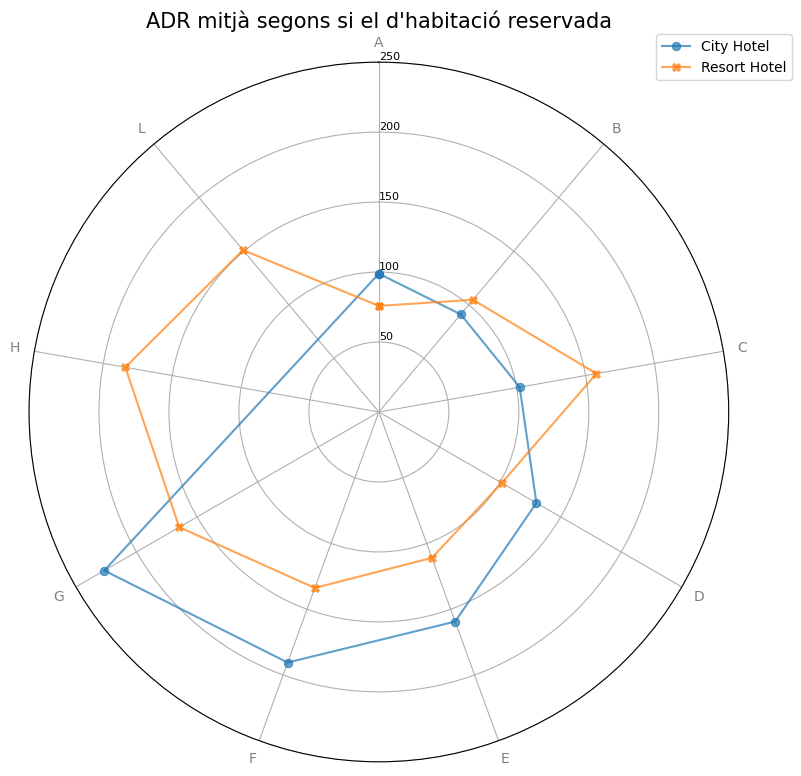

In [15]:
# -- Preparació dades per a gràfic spider chart ADR mitjà segons habitacio reservada --
df_graphic_spider = df_no_outliers.groupby(["hotel", "reserved_room_type"])["adr"].mean().copy().reset_index()
df_graphic_spider = pd.DataFrame(df_graphic_spider).copy()

# -- Spider chart ADR mitjà segons habitacio reservada --
# Bibliografia: [Ref.14] i [Ref.15]
plt.figure(figsize=(8,8))
ax =sp.spiderplot(data=df_graphic_spider, x="reserved_room_type", y="adr", hue="hotel", fill=False, style="hotel", dashes=False)
ax.set_rlim([0,250])
plt.title("ADR mitjà segons si el d'habitació reservada", fontsize=15)
plt.legend(bbox_to_anchor=(1.1, 1.05)) # Bibliografia: [Ref.16]
plt.tight_layout()
plt.savefig("pictures/spider_reserved_room.png")
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>------------------------------------------------------------------------------ Choropleth ADR país ---------------------------------------------------------------------------------</strong>
</div>

In [16]:
# -- Preparació de dades per als gràfics choropleth --
aux = df_no_outliers.groupby(["hotel", "country"])["adr"].mean().copy().reset_index() # Bibliografia: [Ref.3] i [Ref.4]
aux = pd.DataFrame(aux).copy()
aux_city = aux[aux["hotel"] == "City Hotel"].copy()
aux_resort = aux[aux["hotel"] == "Resort Hotel"].copy()

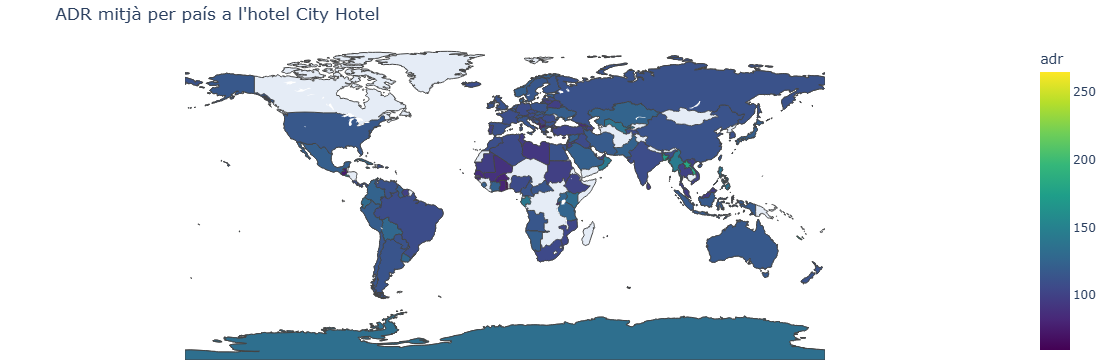

In [17]:
# -- Choropleth ADR mitjà City Hotel --
# Bibliografia: [Ref.17]
fig = px.choropleth(
    aux_city,
    locations="country",
    color="adr",
    color_continuous_scale="Viridis",
    locationmode="ISO-3", # Bibliografia: [Ref.18] i [Ref.19]
    title="ADR mitjà per país a l'hotel City Hotel"
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True), margin=dict(l=0, r=0, t=40, b=0))
fig.show()

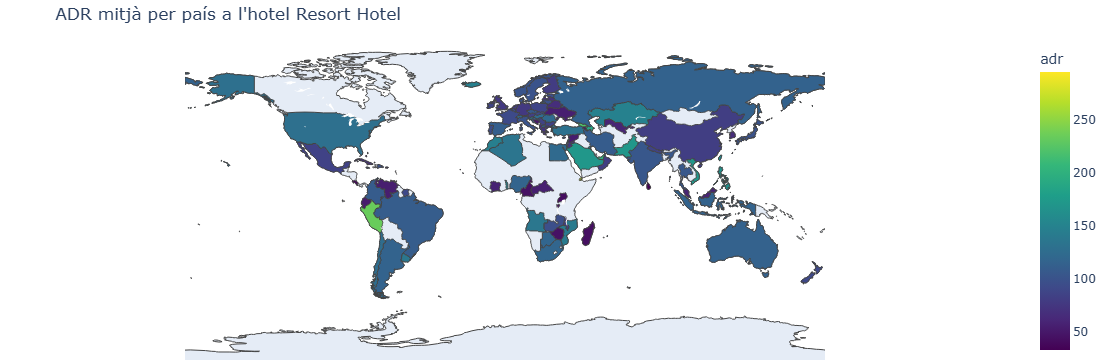

In [18]:
# -- Choropleth ADR mitjà Resort Hotel --
# Bibliografia: [Ref.17]
fig = px.choropleth(
    aux_resort,
    locations="country",
    color="adr",
    color_continuous_scale="Viridis",
    locationmode="ISO-3", # Bibliografia: [Ref.18] i [Ref.19]
    title="ADR mitjà per país a l'hotel Resort Hotel"
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True), margin=dict(l=0, r=0, t=40, b=0))
fig.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>--------------------------------------------------- Connected scatter plot ADR segons nombre nombre places parking ------------------------------------------------------</strong>
</div>

In [19]:
# -- Preparació de dades per als gràfics d'area segons places de parking --
aux = df_no_outliers.groupby(["hotel", "required_car_parking_spaces"])["adr"].mean().copy().reset_index() # Bibliografia: [Ref.3] i [Ref.4]
aux = pd.DataFrame(aux).copy()
aux_city = aux[aux["hotel"] == "City Hotel"].copy()
aux_resort = aux[aux["hotel"] == "Resort Hotel"].copy()

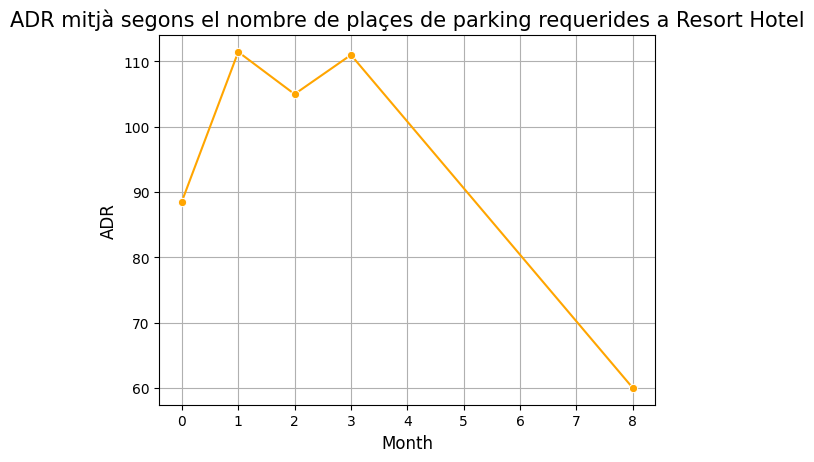

In [20]:
# Bibliografia: [Ref.20]
plt.figure()
sns.lineplot(aux_resort, x="required_car_parking_spaces", y="adr", marker="o", color="orange") # Bibliografia: [Ref.6]
plt.title("ADR mitjà segons el nombre de plaçes de parking requerides a Resort Hotel", fontsize=15)
plt.ylabel("ADR", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid()
plt.savefig("pictures/connected_scatter_parking_resort.png")
plt.show()

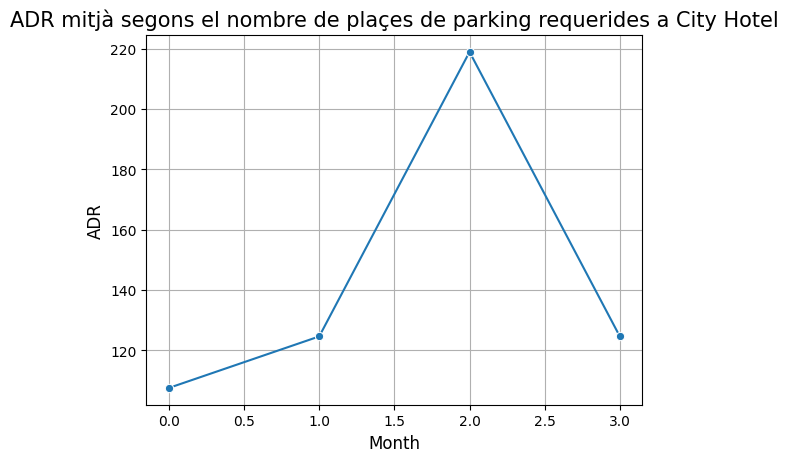

In [21]:
# Bibliografia: [Ref.20]
plt.figure()
sns.lineplot(aux_city, x="required_car_parking_spaces", y="adr", marker="o") # Bibliografia: [Ref.6]
plt.title("ADR mitjà segons el nombre de plaçes de parking requerides a City Hotel", fontsize=15)
plt.ylabel("ADR", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid()
plt.savefig("pictures/connected_scatter_parking_city.png")
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>----------------------------------------------------------------- Spider chart ADR segons segment de mercat ------------------------------------------------------------------</strong>
</div>

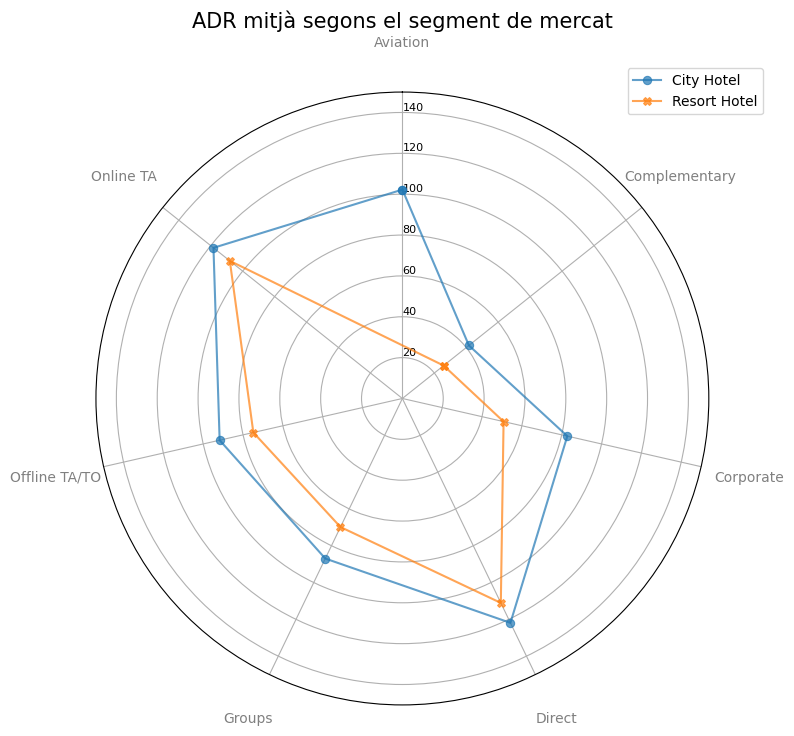

In [22]:
df_graphic_spider2 = df_no_outliers.groupby(["hotel", "market_segment"])["adr"].mean().copy().reset_index()
df_graphic_spider2 = pd.DataFrame(df_graphic_spider2).copy()

# -- Polar chart ADR mitjà segons habitacio reservada --
# Bibliografia: [Ref.14] i [Ref.15]
plt.figure(figsize=(8,8))
ax =sp.spiderplot(data=df_graphic_spider2, x="market_segment", y="adr", hue="hotel", fill=False, style="hotel", dashes=False)
ax.set_rlim([0,150])
plt.title("ADR mitjà segons el segment de mercat", fontsize=15)
plt.tick_params(axis="x", pad=25) # Bibliografia: [Ref.21]
plt.legend(bbox_to_anchor=(1.1, 1.05)) # Bibliografia: [Ref.16]
plt.tight_layout()
plt.savefig("pictures/spider_market_segment.png")
plt.show()

**Referències externes:**

[Ref.1] -- _pandas.isna_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna)

[Ref.2] -- _pandas.DataFrame.any_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Ref.3] -- _Pandas dataframe.groupby() Method_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/](https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/)

[Ref.4] -- _pandas.DataFrame.reset_index_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

[Ref.5] -- _Sort a pandas dataframe series by month name_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://stackoverflow.com/questions/48042915/sort-a-pandas-dataframe-series-by-month-name](https://stackoverflow.com/questions/48042915/sort-a-pandas-dataframe-series-by-month-name)

[Ref.6] -- _seaborn.lineplot_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://seaborn.pydata.org/generated/seaborn.lineplot.html](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

[Ref.7] -- _How to Rotate X-Axis Tick Label Text in Matplotlib?_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/](https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/)

[Ref.8] -- _Lollipop plot_ [en línia][consulta: 17 de desembre de 2025]. Disponible a:[https://python-graph-gallery.com/lollipop-plot/](https://python-graph-gallery.com/lollipop-plot/)

[Ref.9] -- _matplotlib.pyplot.stem_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html)

[Ref.10] -- _Basic Lollipop Plot_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://python-graph-gallery.com/180-basic-lollipop-plot/](https://python-graph-gallery.com/180-basic-lollipop-plot/)

[Ref.11] -- _¿Cómo añadir una columna a un DataFrame en Python?_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://4geeks.com/es/how-to/anadir-columna-dataframe-python](https://4geeks.com/es/how-to/anadir-columna-dataframe-python)

[Ref.12] -- _Change column type in pandas_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://stackoverflow.com/questions/15891038/change-column-type-in-pandas](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

[Ref.13] -- _seaborn.barplot_ [en línia][consulta: 16 de desembre de 2025]. Disponible a: [https://seaborn.pydata.org/generated/seaborn.barplot.html](https://seaborn.pydata.org/generated/seaborn.barplot.html)

[Ref.14] -- _spiderplot 0.1.2_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://pypi.org/project/spiderplot/](https://pypi.org/project/spiderplot/)

[Ref.15] -- _spiderplot_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://github.com/hirsch-lab/spiderplot](https://github.com/hirsch-lab/spiderplot)

[Ref.16] -- _matplotlib.pyplot.legend_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

[Ref.17] -- _Choropleth Maps using Plotly in Python_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://www.geeksforgeeks.org/python/choropleth-maps-using-plotly-in-python/](https://www.geeksforgeeks.org/python/choropleth-maps-using-plotly-in-python/)

[Ref.18] -- _Códigos de países_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://wits.worldbank.org/wits/wits/WITSHELP-es/content/codes/country_codes.htm](https://wits.worldbank.org/wits/wits/WITSHELP-es/content/codes/country_codes.htm)

[Ref.19] -- _Python Figure Reference: choropleth Traces_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://plotly.com/python/reference/choropleth/](https://plotly.com/python/reference/choropleth/)

[Ref.20] -- _Connected scatter plot with Seaborn_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://python-graph-gallery.com/508-connected-scatter-plot-seaborn/](https://python-graph-gallery.com/508-connected-scatter-plot-seaborn/)

[Ref.21] -- _matplotlib.axes.Axes.tick_params_ [en línia][consulta: 17 de desembre de 2025]. Disponible a: [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)